## Importing Libraries

In [104]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Reading the dataset

In [105]:
data = pd.read_csv("IBM Dataset.csv")
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Exploratory Data Analysis
The IBM HR Analytics Employee Attrition and Performance dataset has entry of 1470 employees. A total of 35 columns represent key aspects of employee information.

On the basis of studying all the columns and its respective categorical variables, numeric variables and its outliers, some sub-groups can be derived for our analysis:

## 1. Impact of Finances
    
    i.	Monthly Income
    ii.	Percent Salary Hike
    iii. Stock Option Level
    

## 2. Impact of Work Convenience:
    
    i.	Environment Satisfaction
    ii.	Job Involvement
    iii.	Job Satisfaction
    iv.	Performance Rating

## 3. Impact of Education:

    i.	Education
    ii.	Education Field
    

## 4. Impact of Work Role:

    i.	Department
    ii.	Job Role
    iii.	Over Time
    
## 5. Impact of Personal Life:
    
    i.	Marital Status
    ii.	Relationship Satisfaction
    iii.	Work Life Balance    

## 6. Impact of Work Experience
    
    i.	Total Working Years
    ii.	Training Times Last Year 
    iii.	Years At Company
    iv.	Years In Current Role
    v.	Years Since Last Promotion
    vi.	Years With Current Manager

## 1. Impact of Finances

1. Impact of monthly income. 

In [106]:
fig1 = px.violin(data, x="Attrition", y="MonthlyIncome", box=True)
fig1.show()

for i in data["MonthlyIncome"]:
    if i<5000:
        data['MonthlyIncome'].replace(i, "Less than 5000", inplace=True)
    elif i<10000:
        data['MonthlyIncome'].replace(i, "Between 5000 to 10000", inplace=True)
    elif i<15000:
        data['MonthlyIncome'].replace(i, "Between 10000 to 15000", inplace=True)
    elif i<=20000:
        data['MonthlyIncome'].replace(i, "Between 15000 to 20000", inplace=True)
    elif i>20000:
        data['MonthlyIncome'].replace(i, "Greater than 20000", inplace=True)

df1= data.groupby(["MonthlyIncome"])["Attrition"].value_counts(normalize=True)
df1 = round(df1.mul(100,),2).rename('Percent').reset_index()
df1=df1.reindex([6,7,4,5,0,1,2,3])
fig1 = px.bar(df1, x='MonthlyIncome', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig1.show()

The common observation comes that employees resigned had a fairly lesser median salary than those currently in the company.

Attrition rate has a positive correlation with salary, higher the salary, lesser the attrition rate.

2. Impact of Percent Salary Hike

In [107]:
fig2 = px.violin(data, y="PercentSalaryHike", x="Attrition", box=True)
fig2.show()


for i in data["PercentSalaryHike"]:
    if i<10:
        data['PercentSalaryHike'].replace(i, "Less than 10%", inplace=True)
    elif i<15:
        data['PercentSalaryHike'].replace(i, "Between 10% to 15%", inplace=True)
    elif i<20:
        data['PercentSalaryHike'].replace(i, "Between 15% to 20%", inplace=True)
    elif i<=25:
        data['PercentSalaryHike'].replace(i, "Between 20% to 25%", inplace=True)

df2= data.groupby(["PercentSalaryHike"])["Attrition"].value_counts(normalize=True)
df2 = round(df2.mul(100,),2).rename('Percent').reset_index()
fig2 = px.bar(df2, x='PercentSalaryHike', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig2.show()

Percent Salary hike doesn't have a very major impact in predicting attrition rate. The average attrition rate is nearly same irrespective of a higher percent increase in salary.

3. Impact of Stock Option Level

In [108]:
df3= data.groupby(["StockOptionLevel"])["Attrition"].value_counts(normalize=True)
df3 = round(df3.mul(100,),2).rename('Percent').reset_index()
fig3 = px.bar(df3, x='StockOptionLevel', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
print(data["StockOptionLevel"].value_counts())
fig3.show()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


Almost 50% of the employees don't have a stock option level and they contribute with the highest attrition rate.

Employees with stock option level 1 and 2 have the lowest attrition rate.

## 2. Impact of Work Convinence

1. Impact of Environment Satisfaction.

In [109]:
df4=data.groupby(['EnvironmentSatisfaction'])["Attrition"].value_counts(normalize=True)
df4 = round(df4.mul(100,),2).rename('Percent').reset_index()
df4['EnvironmentSatisfaction'].replace([1,2,3,4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)
fig4 = px.bar(df4, x='EnvironmentSatisfaction', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
              category_orders={'Attrition': ['Yes', 'No']})
fig4.show()

Majority employees contribute to an above average satisfaction level in the company and havee the least attrition rates.

Employees with low environemnt satisfaction rate have the highest attrition rate. Environment satisfaction has a direct coreelation with attrition levels.


2. Impact of Job Involvement

In [110]:
df5=data.groupby(['JobInvolvement'])["Attrition"].value_counts(normalize=True)
df5 = round(df5.mul(100,),2).rename('Percent').reset_index()
df5['JobInvolvement'].replace([1,2,3,4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)
fig5 = px.bar(df5, x='JobInvolvement', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
print(data["JobInvolvement"].value_counts())
fig5.show()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


Employees with low job involvement have a very high attrition rate.

A greater job involvement promises a lesser of attrition rates.

3. Impact of Job Satisfaction

In [111]:
df6=data.groupby(['JobSatisfaction'])["Attrition"].value_counts(normalize=True)
df6 = round(df6.mul(100,),2).rename('Percent').reset_index()
df6['JobSatisfaction'].replace([1,2,3,4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)
fig6 = px.bar(df6, x='JobSatisfaction', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig6.show()

In [112]:
df7=data.groupby(['PerformanceRating'])["Attrition"].value_counts(normalize=True)
df7 = round(df7.mul(100,),2).rename('Percent').reset_index()
df7['PerformanceRating'].replace([1,2,3,4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)
fig7 = px.bar(df7, x='PerformanceRating', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig7.show()

## 3. Impact of Educational Field

1. Impact of Education

In [113]:
df8=data.groupby(['Education'])["Attrition"].value_counts(normalize=True)
df8 = round(df8.mul(100,),2).rename('Percent').reset_index()
df8['Education'].replace([1,2,3,4,5], ['Below College', 'College', 'Bachelor', 'Master','Doctorate'], inplace=True)
fig8 = px.bar(df8, x='Education', y='Percent', color='Attrition', 
            text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})

print("Below College: ", len(data[data["Education"]==1]),"-",round((len(data[data["Education"]==1])/len(data) * 100), 2),"%")
print("College: ", len(data[data["Education"]==2]), "-",round((len(data[data["Education"]==2])/len(data) * 100), 2),"%")
print("Bachelors: ", len(data[data["Education"]==3]), "-",round((len(data[data["Education"]==3])/len(data) * 100), 2),"%")
print("Masters: ", len(data[data["Education"]==4]), "-",round((len(data[data["Education"]==4])/len(data) * 100), 2),"%")
print("Doctorate: ", len(data[data["Education"]==5]), "-",round((len(data[data["Education"]==5])/len(data) * 100), 2),"%")

fig8.show()

Below College:  170 - 11.56 %
College:  282 - 19.18 %
Bachelors:  572 - 38.91 %
Masters:  398 - 27.07 %
Doctorate:  48 - 3.27 %


Maximum company employees have a bachelors as highest form of education.

Doctorate employees have the least attrition levels below college employees have the highest attrition levels.

Now analysing on the basis of the respective education fields.

2. Impact of Education Fields

In [114]:
df9= data.groupby(["EducationField", "Education"])["Attrition"].value_counts(normalize=True)
df9 = round(df9.mul(100,),2).rename('Percent').reset_index()
df9=df9.reindex([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 0, 1, 2, 3, 4, 5, 6, 7, 8])
df9['Education'].replace([1,2,3,4,5], ['Below College', 'College', 'Bachelor', 'Master','Doctorate'], inplace=True)
fig9 = px.bar(df9, x='Education', y='Percent', color='Attrition', 
              facet_row="EducationField",text='Percent', barmode='group', height=1500, 
             category_orders={'Attrition': ['Yes', 'No']})
print(data["EducationField"].value_counts())
fig9.show()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Employees having an education field in life sciences and medical field are maximum in number and have the least average attrition rate amongst all the employees.

Employees with Marketing, Technical Degree, Human Resources and other education fields consist of a lesser workforce in the company, and also have a higher average attrition rate.

## 4. Impact of Work Role

1. Analysing the attrition rate department wise.

In [115]:
df10= data.groupby(["Department"])["Attrition"].value_counts(normalize=True)
df10 = round(df10.mul(100,),2).rename('Percent').reset_index()
fig10 = px.bar(df10, x='Department', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
print(data["Department"].value_counts())
fig10.show()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


The general observation coming through the above analysis, the department having the lesser number of employees has a higher attrition rate.

Each department have a different job roles, having different attrition rates.

2. Analysing each department with its respective job roles.

In [116]:
df11= data.groupby(["Department", "JobRole"])["Attrition"].value_counts(normalize=True)
df11 = round(df11.mul(100,),2).rename('Percent').reset_index()
fig11 = px.bar(df11, x='JobRole', y='Percent', color='Attrition', 
             facet_row="Department", text='Percent', barmode='group', height=1000,
             category_orders={'Attrition': ['Yes', 'No']})
print(data["JobRole"].value_counts())
fig11.show()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In all the departments, mangerial posts have the least attrition rate.

Research and development having the most employees and a wider range of employees has the least attrition rate.

The dataset also contains information on overtime employees.

3. Analysing over time working employees.

In [117]:
df12= data.groupby(["OverTime", "JobRole"])["Attrition"].value_counts(normalize=True)
df12 = round(df12.mul(100,),2).rename('Percent').reset_index()
fig12 = px.bar(df12, x='JobRole', y='Percent', color='Attrition', 
             facet_row="OverTime", text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig12.show()

Job roles of human resources, laboratory technician, resarch scientist, sales executive, sales representative have a significantly higher employee attrition rate, irrespective of the fact whether they are an overtime employee or not.


It is a clearly visible overtime employees have a higher attrition rate.

Also, which job role has the most overtime employees.

## 5. Impact of Personal Life

1. Impact of Marital Status.

In [118]:
df13= data.groupby(["MaritalStatus"])["Attrition"].value_counts(normalize=True)
df13 = round(df13.mul(100,),2).rename('Percent').reset_index()
fig13 = px.bar(df13, x='MaritalStatus', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
print(data["MaritalStatus"].value_counts())
fig13.show()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


2. Impact of Relationship Satisfaction.

In [119]:
df14=data.groupby(['RelationshipSatisfaction'])["Attrition"].value_counts(normalize=True)
df14 = round(df14.mul(100,),2).rename('Percent').reset_index()
df14['RelationshipSatisfaction'].replace([1,2,3,4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)
fig14 = px.bar(df14, x='RelationshipSatisfaction', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig14.show()

3. Impact of Work Life Balance

In [120]:
df15=data.groupby(['WorkLifeBalance'])["Attrition"].value_counts(normalize=True)
df15 = round(df15.mul(100,),2).rename('Percent').reset_index()
df15['WorkLifeBalance'].replace([1,2,3,4], ['Bad', 'Good', 'Better', 'Best'], inplace=True)
fig15 = px.bar(df15, x='WorkLifeBalance', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig15.show()

## 6. Impact of Work Experience

1. Impact of Total Working Years

In [121]:
for i in data["TotalWorkingYears"]:
    if i<5:
        data['TotalWorkingYears'].replace(i, "Less than 5 Years", inplace=True)
    elif i<10:
        data['TotalWorkingYears'].replace(i, "Between 5 to 10 Years", inplace=True)
    elif i<20:
        data['TotalWorkingYears'].replace(i, "Between 10 to 20 Years", inplace=True)
    elif i<30:
        data['TotalWorkingYears'].replace(i, "Between 20 to 30 Years", inplace=True)
    elif i<=40:
        data['TotalWorkingYears'].replace(i, "Between 30 to 40 Years", inplace=True)

df16= data.groupby(["TotalWorkingYears"])["Attrition"].value_counts(normalize=True)
df16 = round(df16.mul(100,),2).rename('Percent').reset_index()
df16=df16.reindex([8,9,6,7,0,1,2,3,4,5])
fig16 = px.bar(df16, x='TotalWorkingYears', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig16.show()

Employees having higher work experience are seen to have less attrition rates.

2. Impact of Training Times in a Year

In [122]:
for i in data["TrainingTimesLastYear"]:
    if i<2:
        data["TrainingTimesLastYear"].replace(i, "Less than 2 Sessions", inplace=True)
    elif i<4:
        data["TrainingTimesLastYear"].replace(i, "Between 2 to 4 Sessions", inplace=True)
    elif i<=6:
        data["TrainingTimesLastYear"].replace(i, "Between 4 to 6 Sessions", inplace=True)

df17= data.groupby(["TrainingTimesLastYear"])["Attrition"].value_counts(normalize=True)
df17 = round(df17.mul(100,),2).rename('Percent').reset_index()
df17=df17.reindex([8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7,])
fig17 = px.bar(df17, x="TrainingTimesLastYear", y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig17.show()

3. Working years at this company.

In [123]:
for i in data["YearsAtCompany"]:
    if i<5:
        data['YearsAtCompany'].replace(i, "Less than 5 Years", inplace=True)
    elif i<10:
        data['YearsAtCompany'].replace(i, "Between 5 to 10 Years", inplace=True)
    elif i<20:
        data['YearsAtCompany'].replace(i, "Between 10 to 20 Years", inplace=True)
    elif i<30:
        data['YearsAtCompany'].replace(i, "Between 20 to 30 Years", inplace=True)
    elif i<=40:
        data['YearsAtCompany'].replace(i, "Between 30 to 40 Years", inplace=True)
df18= data.groupby(["YearsAtCompany"])["Attrition"].value_counts(normalize=True)
df18 = round(df18.mul(100,),2).rename('Percent').reset_index()
df18=df18.reindex([15, 16, 17, 18, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
fig18 = px.bar(df18, x='YearsAtCompany', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig18.show()

EMployees having higher work experience in this company tend to stay in the company.

4. Years in current role.

In [124]:
for i in data["YearsInCurrentRole"]:
    if i<5:
        data['YearsInCurrentRole'].replace(i, "Less than 5 Years", inplace=True)
    elif i<10:
        data['YearsInCurrentRole'].replace(i, "Between 5 to 10 Years", inplace=True)
    elif i<15:
        data['YearsInCurrentRole'].replace(i, "Between 10 to 15 Years", inplace=True)
    elif i<20:
        data['YearsInCurrentRole'].replace(i, "Between 15 to 20 Years", inplace=True)
        
df19= data.groupby(["YearsInCurrentRole"])["Attrition"].value_counts(normalize=True)
df19 = round(df19.mul(100,),2).rename('Percent').reset_index()
df19=df19.reindex([12, 13, 14, 15, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7])
fig19 = px.bar(df19, x='YearsInCurrentRole', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig19.show()

5. Years since last promotion.

In [125]:
for i in data["YearsSinceLastPromotion"]:
    if i<5:
        data['YearsSinceLastPromotion'].replace(i, "Less than 5 Years", inplace=True)
    elif i<10:
        data['YearsSinceLastPromotion'].replace(i, "Between 5 to 10 Years", inplace=True)
    elif i<=15:
        data['YearsSinceLastPromotion'].replace(i, "Between 10 to 15 Years", inplace=True)
        
df20= data.groupby(["YearsSinceLastPromotion"])["Attrition"].value_counts(normalize=True)
df20 = round(df20.mul(100,),2).rename('Percent').reset_index()
df20=df20.reindex([8,9,10,11,4,5,6,7,0,1,2,3])
fig20 = px.bar(df20, x='YearsSinceLastPromotion', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig20.show()

6. Years with Current Manager

In [126]:
for i in data["YearsWithCurrManager"]:
    if i<5:
        data['YearsWithCurrManager'].replace(i, "Less than 5 Years", inplace=True)
    elif i<10:
        data['YearsWithCurrManager'].replace(i, "Between 5 to 10 Years", inplace=True)
    elif i<15:
        data['YearsWithCurrManager'].replace(i, "Between 10 to 15 Years", inplace=True)
    elif i<20:
        data['YearsWithCurrManager'].replace(i, "Between 15 to 20 Years", inplace=True)
        
df21= data.groupby(["YearsInCurrentRole"])["Attrition"].value_counts(normalize=True)
df21 = round(df21.mul(100,),2).rename('Percent').reset_index()
df21=df21.reindex([12, 13, 14, 15, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7])
fig21 = px.bar(df21, x='YearsInCurrentRole', y='Percent', color='Attrition', 
             text='Percent', barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']})
fig21.show()

# Observations

The following list highlights the main thoughts that emerged from this analysis:
1.	Employees that studied in HR, Marketing and Technical had a higher attrition rate than all the others.
2.	Sales representatives had a tremendously high attrition rate, whilst managers, directors and people in the more senior roles tended to remain in the company’s workforce.
3.	Attrition was slightly higher for males.
4.	A ‘sweet spot’ for employees that were in their third fourth or fifth job was noticed. The attrition rate in these cases was remarkably low.
5.	Singles were more likely to leave the company than divorced and married employees.
6.	Attrition was slightly less in the R&D department when compared to the sales and HR departments.
7.	Employees that were not satisfied in the company, that were very unhappy in their team, that did not have a healthy work life balance, and that were not happy with their work environment were more likely to leave. In all cases we noticed that the attrition rate for ‘very unhappy’ employees was around double than for the other cases.
8.	There was a preferred stock option scheme, the option number 3. The attrition rate for this scheme was much lower than for the other three.
9.	Training was also a very important factor. We noticed that the attrition rate for the employees that received no training was around 25%, compared to values that range from 10% to 15% for employees that did receive some training.
10.	The performance rating had no effect on attrition. As we noticed before, all employees were graded as either 3 or 4. In this analysis we noticed that turnover was practically the same in both cases. In addition, we noticed that a only a small percentage (12%) of the total workforce were rated a grade 4.
11.	Employees that were not involved in their work tended to leave.
12.	Overtime had a negative effect on attrition. We noticed that employees were more likely to leave when they did overtime. 
13.	A similar situation was encountered when travel was considered. Employees that travelled frequently were more likely to leave.

# Data Preprocessing

To proceed with the development of a predictive model, certain columns have to deleted or either have to be encoded inorder to create a high accuracy predective model.

In [127]:
data = pd.read_csv("IBM Dataset.csv") 

## Checking all the columns.

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##  Describing the statistical variables.

In [129]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

On observing the columns, all features are either form of numerical data or are categorical variables.

In [130]:
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)
print("Numerical features: ",len(numeric_columns))
print("Catergorical features: ",len(categorical_columns))

Numerical features:  26
Catergorical features:  9


## Understanding the categorical variables.

In [131]:
for column in categorical_columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
_________________________________________________

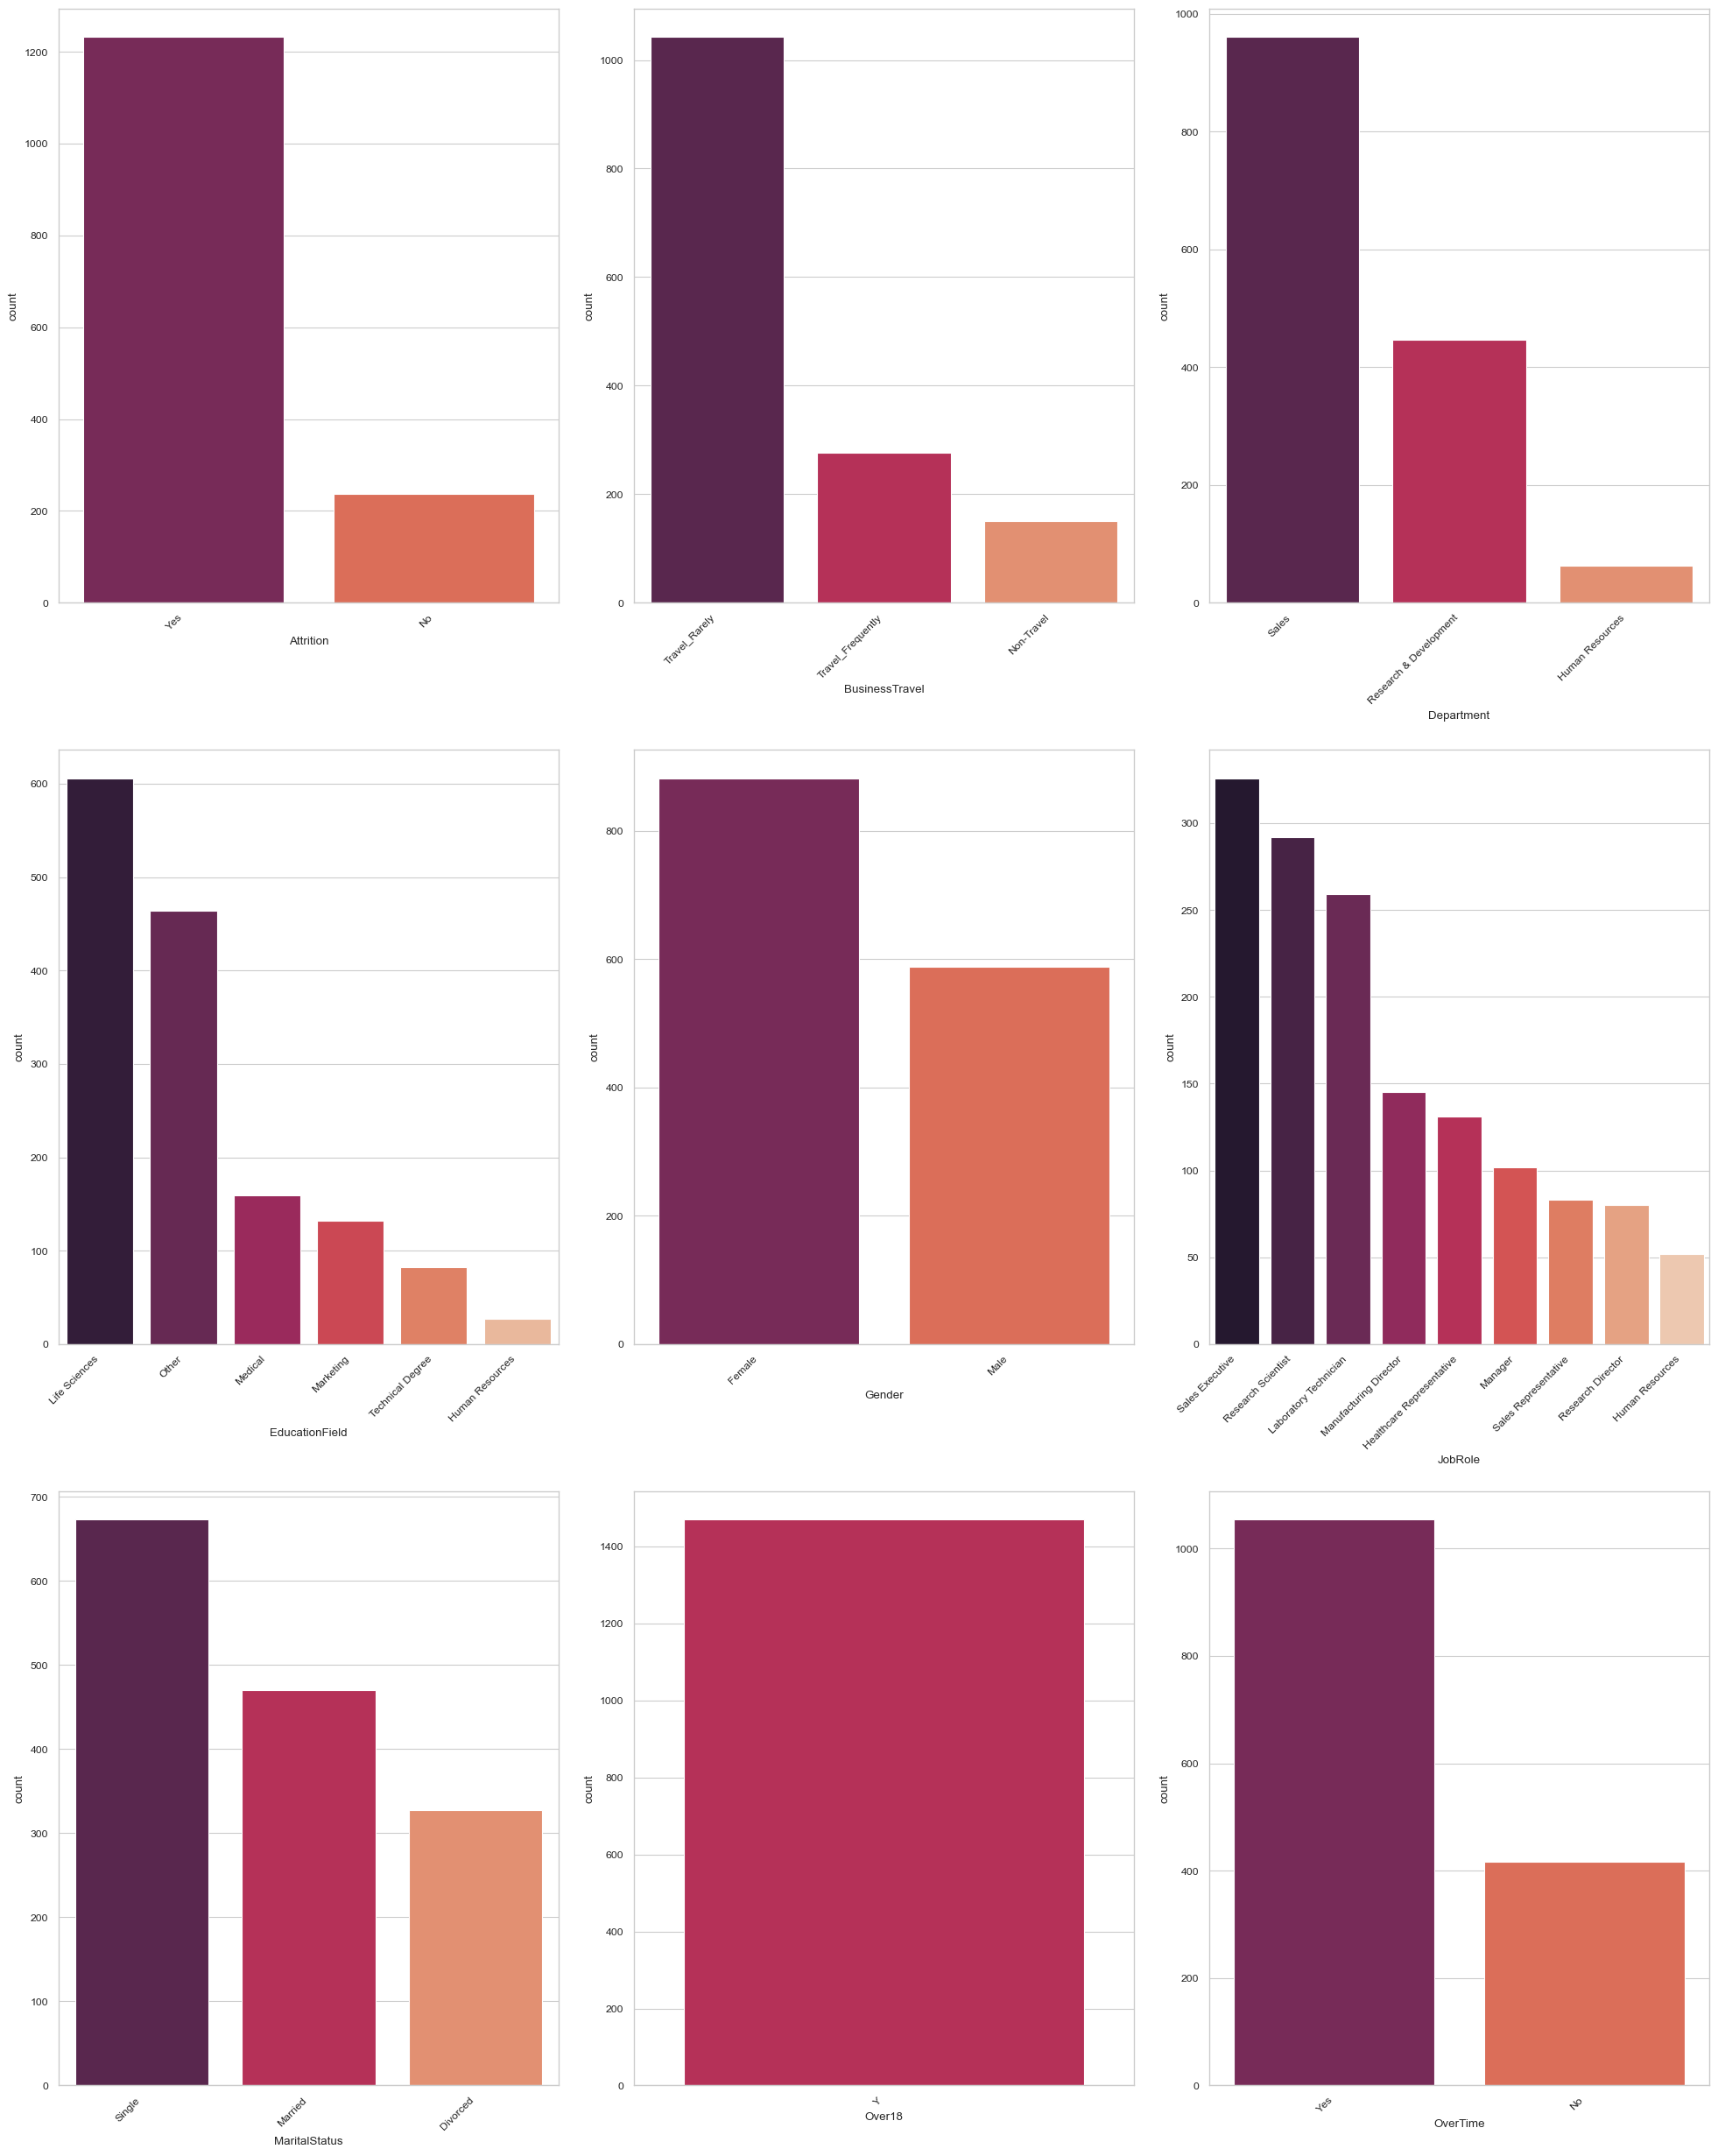

In [132]:
fig, ax = plt.subplots(3,3, figsize = (20,25))
sns.set_context("paper", font_scale=2)
ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i], palette="rocket", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

## Understanding numerical variables.

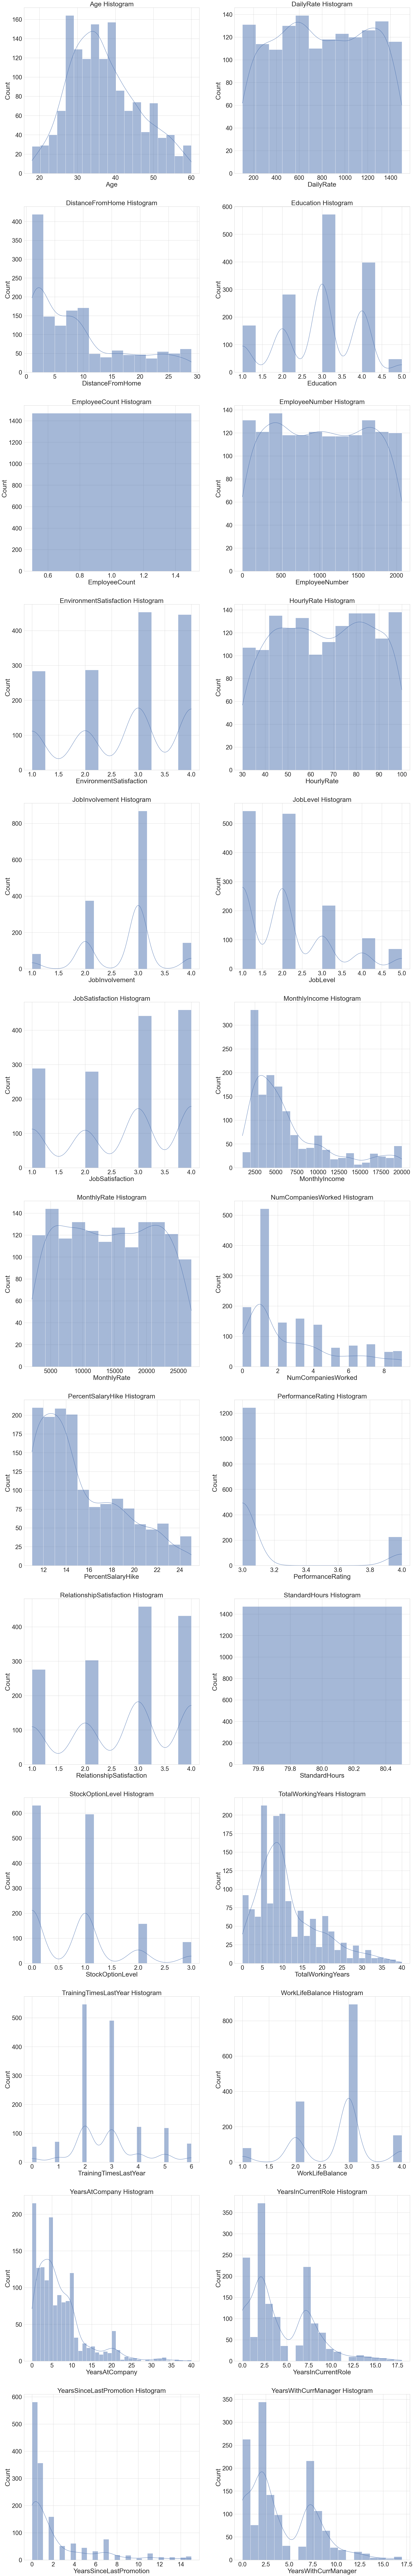

In [133]:
sns.set_context("paper", font_scale=3)
plt.figure(figsize = (30,200))
for i,feature in enumerate(numeric_columns):
    ax = plt.subplot(13,2,i+1)
    sns.histplot(data[feature],kde = True)
    ax.set_title(feature + " Histogram")

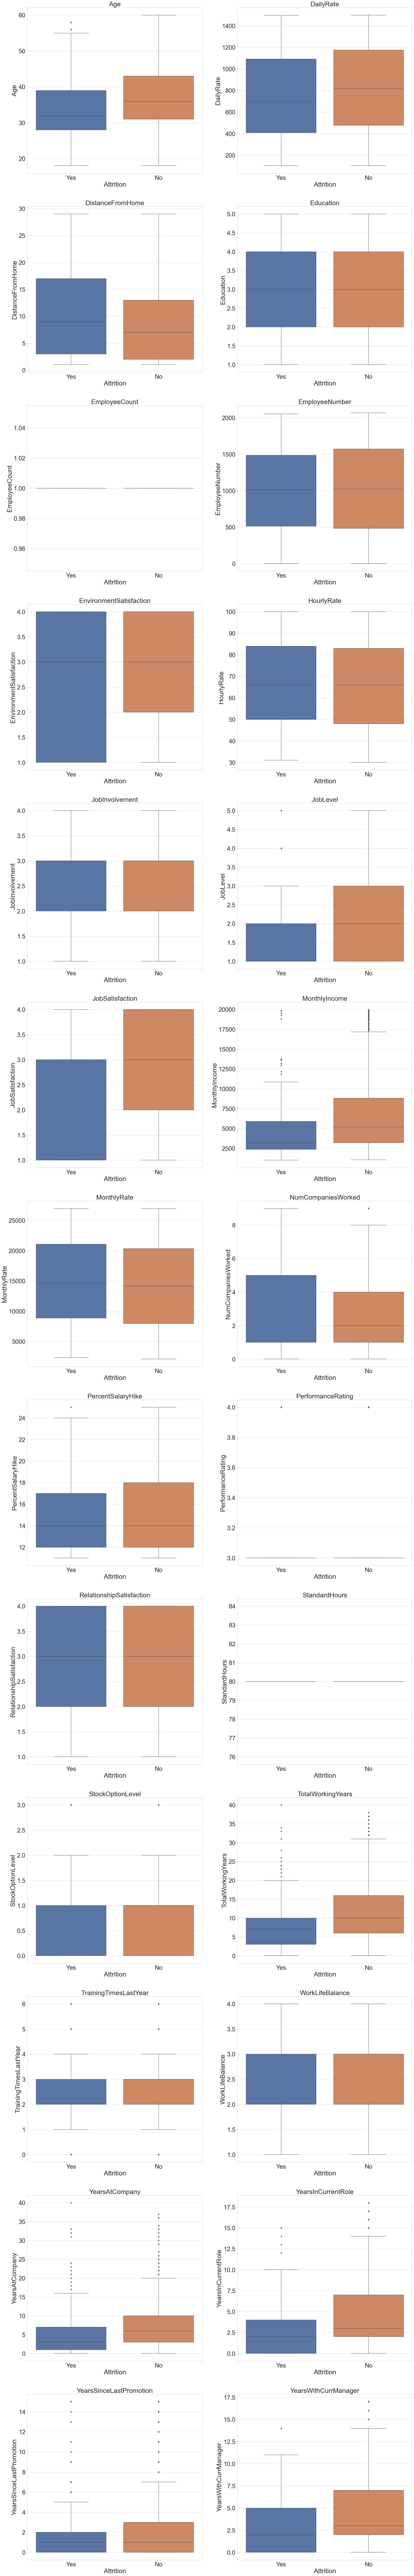

In [134]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=3)          
plt.figure(figsize = (30,200))
for i,feature in enumerate(numeric_columns):
    ax = plt.subplot(13,2,i+1)
    sns.boxplot(y = data[feature], x = data['Attrition'])
    ax.set_title(feature)

## Removing irrelevant features

In [135]:
no_use = []
for col in data.columns:
    if(len(data[col].unique())==1):
        no_use.append(col)
no_use     

['EmployeeCount', 'Over18', 'StandardHours']

In [136]:
data.drop(columns = no_use , axis = 1 , inplace = True)

## Binary Features Encoding

In [137]:
binaryfeatures= []
for col in data.select_dtypes('object').columns:
    if(len(data[col].unique()) ==2):
        binaryfeatures.append(col)
        
binaryfeatures

['Attrition', 'Gender', 'OverTime']

In [138]:
data['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)
data['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
data['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)

## Categorical Features Encoding

In [139]:
from sklearn.preprocessing import LabelEncoder
others = data.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [140]:
le = LabelEncoder()
for col in others:
    data[col] = le.fit_transform(data[col])

## Applying label encoding to numerical variables.

In [141]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
        if data[column].dtype == "float64":
            continue
        data[column] = LabelEncoder().fit_transform(data[column])

## Plotting the correlation 

<Axes: >

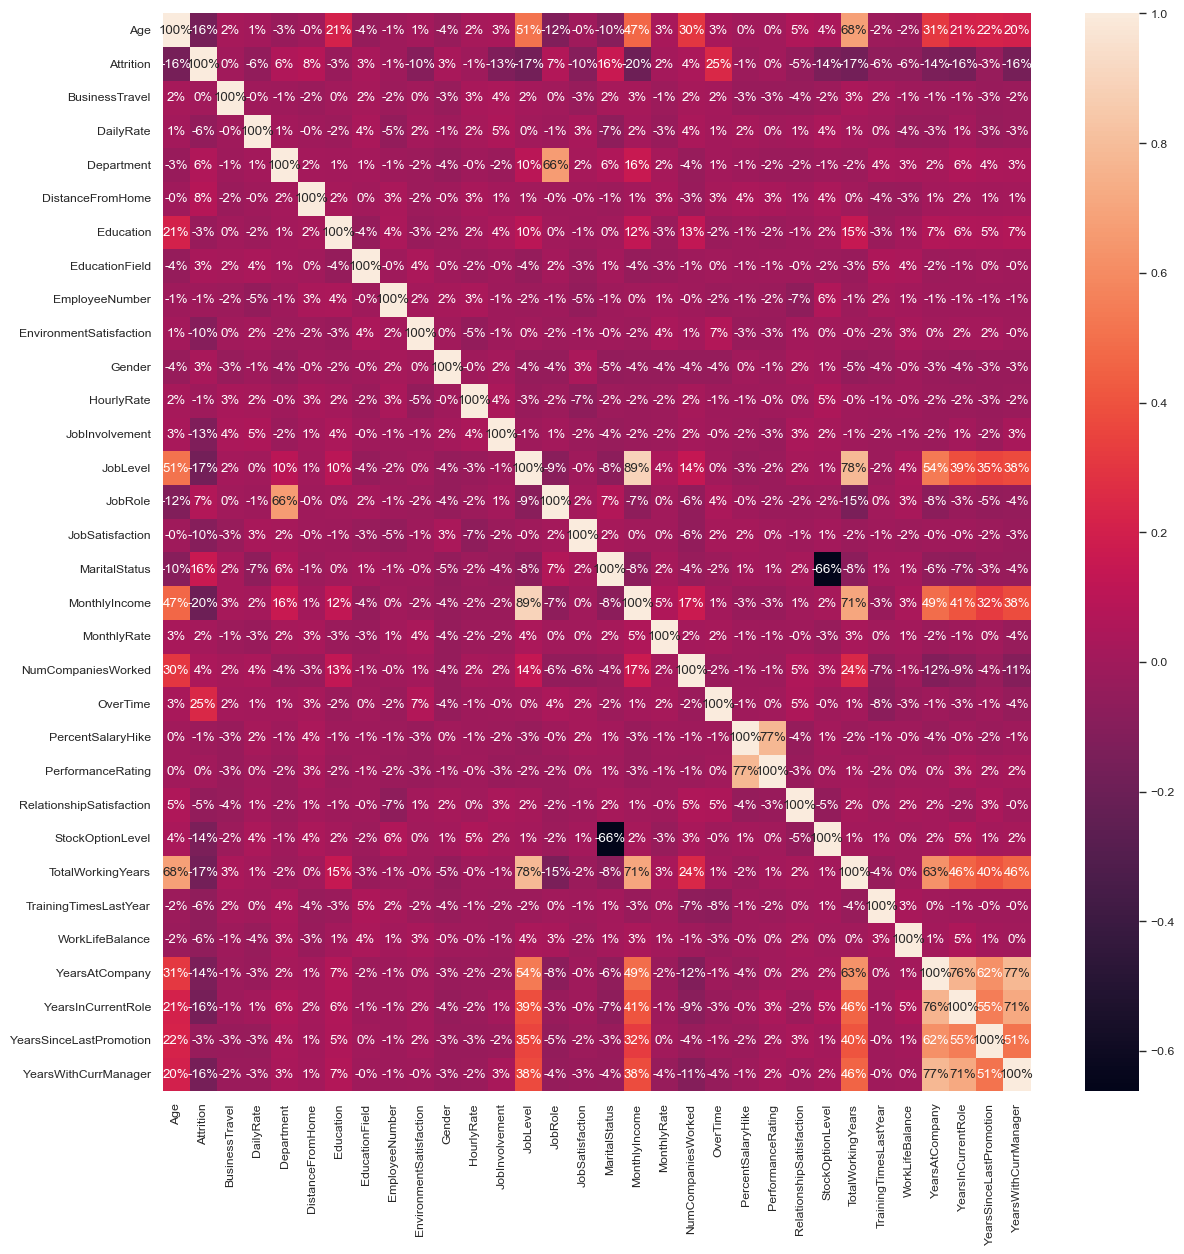

In [142]:
sns.set_context("paper", font_scale=1)     
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(data.corr(), annot=True, fmt='.0%')

Dropping the strongly correlated columns.

i. 'YearsInCurrentRole' strongly correlated to 'YearsAtCompany'

ii. 'JobLevel' strongly correlated to 'MonthlyIncome'

iii. 'JobLevel' strongly correlated to 'TotalWorkingYears'

iv. 'MonthlyIncome' strongly correlated to 'TotalWorkingYears'

v. 'YearsAtCompany' strongly correlated to 'YearsWithCurrManager'

vi. 'YearsAtCompany' strongly correlated to 'YearsInCurrRole'

vii. 'YearsInCurrRole' strongly correlated to 'YearsWithCurrManager'

In [143]:
data.drop(['TotalWorkingYears','YearsInCurrentRole','JobLevel', 'YearsWithCurrManager'],axis=1, inplace=True)

## Scaling the data

In [144]:
from sklearn.preprocessing import StandardScaler
num_features = ['Age',
                'DailyRate',
                'HourlyRate',
                'DistanceFromHome', 
                'MonthlyIncome', 'MonthlyRate', 
                'PercentSalaryHike', 'YearsAtCompany', 
                'YearsSinceLastPromotion']
sc = StandardScaler()
for feature in num_features:
    data[feature] = sc.fit_transform(np.array(data[feature]).reshape(-1,1))

# Creating the predictive model.

Initially to create a predicitve model, the dataset has to balanced. Under the column attrition, the dataset consists 84% employees are under 'yes' and 16% are under 'no', which create a biased model.

In [145]:
from imblearn.over_sampling import SMOTE
x = data.drop('Attrition' ,axis =1)
y = data['Attrition']

smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)

print(x.shape ,y.shape)

(2466, 27) (2466,)


The dataset has to be divided into a train test sample, where 75% of the data is used to to create and verify the algorithim, and the rest 25% of the data is used to check the accuracy of the created model.

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.25 , random_state= 0)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Now as the train and test dataset is ready, it it time to select the algorithm suitable for the dataset. The following algorithms can be considered for the dataset: 

1. Logistic Regression
2. KNeigghbors Classifiers
3. Linear Discriminant Analysis
4. Support Vector Machines (SVMs)
5. Decision Tree Classifier
6. AdaBoost Classifier
7. Random Forest Classifier
8. Gaussian Naive Bayes

The algorithm will be selected with high precision, accuracy, f1 score and least negative mean square error.

In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

k = KFold(n_splits = 10)

models_list= [LogisticRegression(), 
          KNeighborsClassifier(), 
          LinearDiscriminantAnalysis(), 
          SVC(kernel = 'linear'), 
          DecisionTreeClassifier(criterion = 'entropy',max_depth = 3), 
          AdaBoostClassifier(n_estimators=1000), 
          RandomForestClassifier(n_estimators = 1000), 
          GaussianNB()]

models_names = ['Logistic Regression',
     'KNeighborsClassifier',
     'LinearDiscriminantAnalysis', 
     'Support Vector',
     'Decision Tree',
     'AdaBoostClassifier',
     'Random Forest',
     'GaussianNB']

neg_mean_squared_error=[]

for i in models_list:
    print(i,":")
    model = i
    cv_result = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    neg_mean_squared_error.append(cv_result.mean())
    y_pred = cross_val_predict(model,x_train,y_train,cv=5)
    print(classification_report(y_train,y_pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       934
           1       0.83      0.83      0.83       915

    accuracy                           0.84      1849
   macro avg       0.84      0.84      0.84      1849
weighted avg       0.84      0.84      0.84      1849


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       934
           1       0.74      0.97      0.84       915

    accuracy                           0.82      1849
   macro avg       0.85      0.82      0.81      1849
weighted avg       0.85      0.82      0.81      1849


LinearDiscriminantAnalysis() :
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       934
           1       0.83      0.83      0.83       915

    accuracy                           0.83      1849
   macro avg       0.83      0.83      0.83    

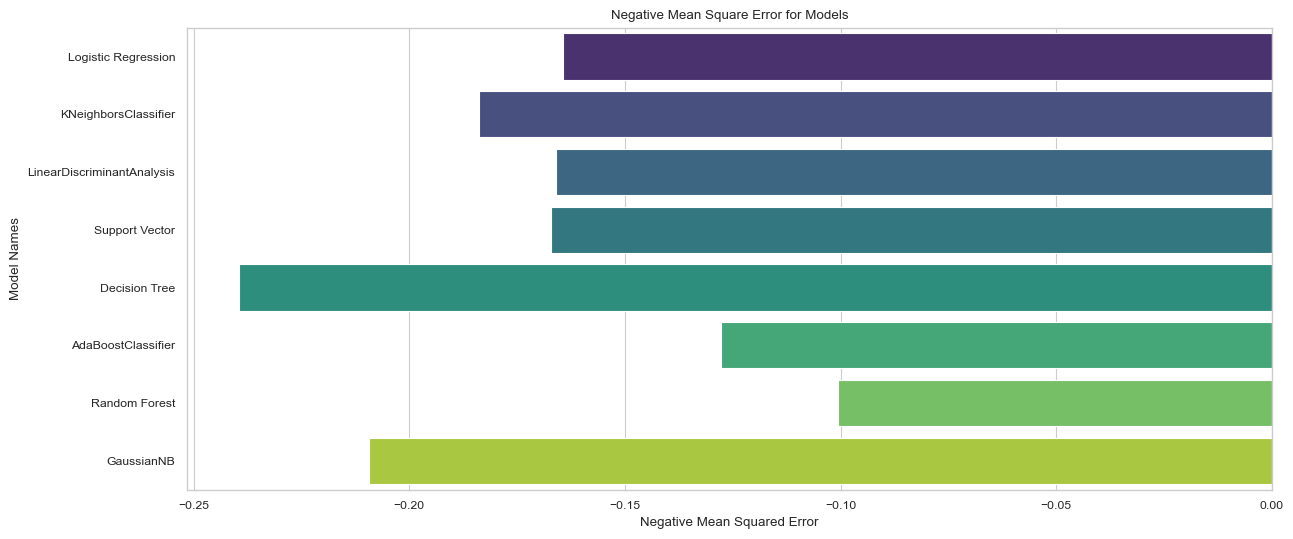

In [148]:
# Assuming you have the required data in 'neg_mean_squared_error' and 'models_names'
plt.figure(figsize=(14, 6))
plt.title('Negative Mean Square Error for Models')
sns.barplot(x=neg_mean_squared_error, y=models_names, palette="viridis")
plt.xlabel('Negative Mean Squared Error')
plt.ylabel('Model Names')
plt.show()


From the classification report of all the algorithms and the graph of negative mean square errors, Random Forest Algorithm comes out to have the highest accuracy, precision, f1 score and the least negative mean square error.

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param={'n_estimators':(1000,2000),'criterion':('gini','entrophy'),'max_depth':(3,5)}
rf_Grid = GridSearchCV(estimator = RandomForestClassifier(random_state=1), param_grid = param, cv = 3, verbose=2, n_jobs = 4)

In [150]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=4,
             param_grid={'criterion': ('gini', 'entrophy'), 'max_depth': (3, 5),
                         'n_estimators': (1000, 2000)},
             verbose=2)

In [151]:
rf_Grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 1000}

In [152]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train)*100:.2f}%')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test)*100:.2f}%')

Train Accuracy - : 89.40%
Test Accuracy - : 82.98%


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
forest=RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=5,random_state=1)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=1)

In [154]:
cm = confusion_matrix(y_test, forest.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)

[[257  42]
 [ 64 254]]


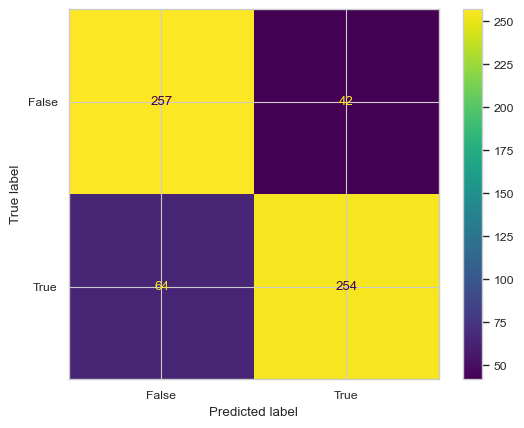

In [155]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

Different attributes suggesting the dataset.

In [156]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 2000, criterion = 'gini', random_state = 0, max_depth=5)
forest.fit(x_train, y_train)

importances = pd.DataFrame({'feature':data.iloc[:, 1:data.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) 
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                             
StockOptionLevel               0.186
JobSatisfaction                0.121
JobInvolvement                 0.089
MonthlyIncome                  0.074
EnvironmentSatisfaction        0.073
YearsAtCompany                 0.061
Attrition                      0.047
DistanceFromHome               0.046
RelationshipSatisfaction       0.036
BusinessTravel                 0.031
Education                      0.030
WorkLifeBalance                0.026
TrainingTimesLastYear          0.022
EmployeeNumber                 0.019
YearsSinceLastPromotion        0.019
MaritalStatus                  0.019
HourlyRate                     0.018
DailyRate                      0.017
MonthlyRate                    0.014
PercentSalaryHike              0.011
OverTime                       0.008
NumCompaniesWorked             0.008
JobRole                        0.007
Gender                         0.006
EducationField                 0.005
PerformanceRating              0.003
Department                     0.003